# CNNs

In the first stage, let's prepare data for training - we will use the Fashion MNIST dataset.

> [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/)

In [1]:
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

2024-05-28 09:02:40.207216: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 09:02:41.022634: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 09:02:41.029003: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 09:02:44.359311: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test)

In [3]:
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [4]:
no_of_classes = 10
(img_width, img_height, img_depth)  = (28, 28, 1)

model_simple = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=2, activation='relu', 
                           input_shape=(img_width, img_height, img_depth), padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
  ])

model_simple.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        2336      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
batch_size = 32
epochs = 10
learning_rate = 0.01

In [30]:
history_simple = model_simple.fit(X_train, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(X_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5468 - accuracy: 0.8425 - val_loss: 0.3805 - val_accuracy: 0.8696
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2984 - accuracy: 0.8905 - val_loss: 0.3076 - val_accuracy: 0.8920
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2564 - accuracy: 0.9044 - val_loss: 0.2859 - val_accuracy: 0.8988
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2284 - accuracy: 0.9140 - val_loss: 0.2986 - val_accuracy: 0.8988
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2066 - accuracy: 0.9230 - val_loss: 0.2986 - val_accuracy: 0.9000
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1884 - accuracy: 0.9276 - val_loss: 0.3099 - val_accuracy: 0.9032
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1677 - accuracy: 0.9365 - val_loss: 0.3404 -

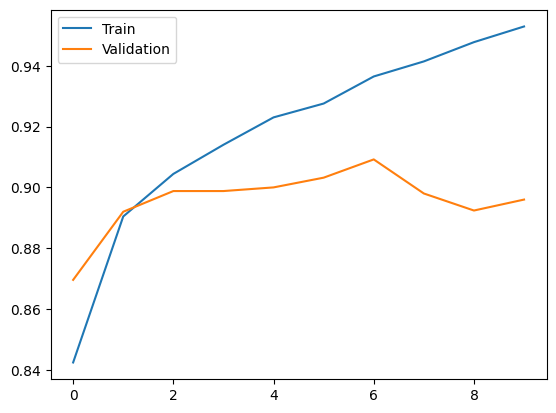

In [31]:
plt.plot(history_simple.history["accuracy"], label="Train")
plt.plot(history_simple.history["val_accuracy"], label="Validation")
plt.legend()
plt.show()

In order to improve the results we get and additionally - to prevent overfitting to the training data and achieve good generalization, let's check some techniques that help to prevent overfitting of the model.

The first technique will be **data normalization**. In this case, let's scale the input data to a range from 0 to 1.

In [6]:
normalizer = Normalization()

normalizer.adapt(X_train)

X_train_norm = normalizer(X_train)
X_val_norm = normalizer(X_val)

In [33]:
history_simple_norm = model_simple.fit(X_train_norm, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(X_val_norm, y_val))

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4343 - accuracy: 0.8393 - val_loss: 0.3770 - val_accuracy: 0.8644
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3136 - accuracy: 0.8826 - val_loss: 0.3086 - val_accuracy: 0.8888
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2765 - accuracy: 0.8972 - val_loss: 0.2940 - val_accuracy: 0.8976
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2465 - accuracy: 0.9084 - val_loss: 0.2706 - val_accuracy: 0.9000
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2211 - accuracy: 0.9161 - val_loss: 0.2620 - val_accuracy: 0.9008
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2003 - accuracy: 0.9246 - val_loss: 0.2526 - val_accuracy: 0.9144
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1811 - accuracy: 0.9315 - val_loss: 0.2604 -

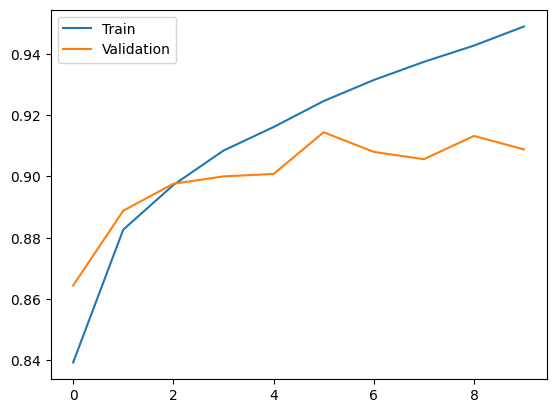

In [34]:
plt.plot(history_simple_norm.history["accuracy"], label="Train")
plt.plot(history_simple_norm.history["val_accuracy"], label="Validation")
plt.legend()
plt.show()

Another technique that helps prevent model overfitting is **data augmentation**. It should be used in particular if our dataset contains few training examples - the model cannot learn generalizations that it could use when processing new data. Using augmentation, the network will not see the same image twice, but the images will look credible and will be similar to each other, so it will be able to pay attention to more aspects of the processed data and create better generalizations.

In [7]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)

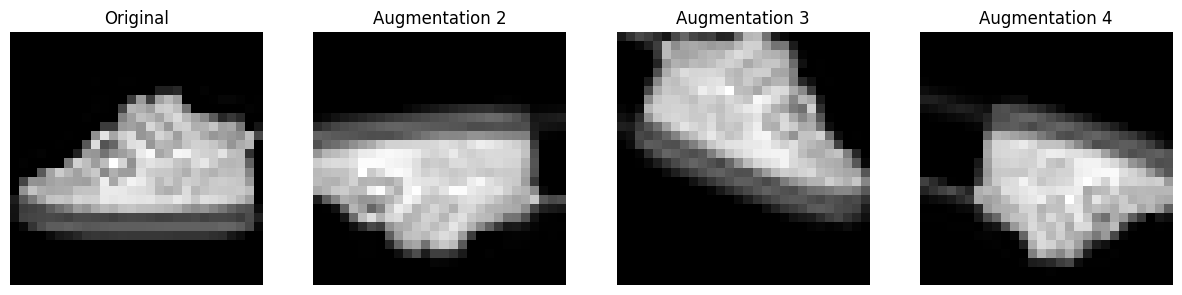

In [36]:
sample_image = X_test[2]

sample_image = np.expand_dims(sample_image, axis=0)

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, ax in enumerate(axs):
    if i == 0:
        ax.imshow(sample_image[0].reshape(28, 28), cmap='gray')
        ax.set_title('Original')
    else:
        augmented_image = next(datagen.flow(sample_image, batch_size=1))
        ax.imshow(augmented_image[0].reshape(28, 28), cmap='gray')
        ax.set_title(f'Augmentation {i+1}')
    ax.axis('off')

plt.show()

In [37]:
history_simple_augm = model_simple.fit(
    datagen.flow(X_train_norm, y_train, batch_size=batch_size),
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_norm, y_val))

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.9575 - accuracy: 0.6485 - val_loss: 0.5033 - val_accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.7469 - accuracy: 0.7241 - val_loss: 0.4830 - val_accuracy: 0.8368
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.6893 - accuracy: 0.7458 - val_loss: 0.4554 - val_accuracy: 0.8356
Epoch 4/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.6516 - accuracy: 0.7600 - val_loss: 0.5124 - val_accuracy: 0.8256
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.6265 - accuracy: 0.7687 - val_loss: 0.4528 - val_accuracy: 0.8400
Epoch 6/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.6027 - accuracy: 0.7778 - val_loss: 0.4527 - val_accuracy: 0.8388
Epoch 7/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.5900 - accuracy: 0.7815 - val_loss: 0.4688 -

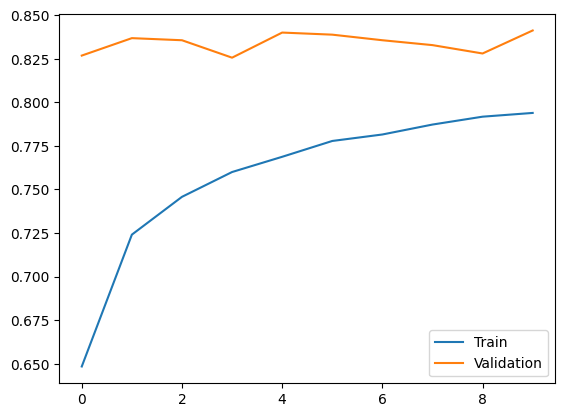

In [38]:
plt.plot(history_simple_augm.history["accuracy"], label="Train")
plt.plot(history_simple_augm.history["val_accuracy"], label="Validation")
plt.legend()
plt.show()

Another technique used to reduce the risk of network overfitting is *dropout*, which involves randomly selecting a given number of output features of a layer during training - the values ​​of these layers are replaced with zeros.

> [Dropout](https://keras.io/api/layers/regularization_layers/dropout/)



Using the normalization, augmentation, and dropout created in previous steps, create a new model by modifying the structure of model_simple. Add normalization before the first convolutional layer, and then augment the data. After each maxpooling layer, add dropout with a probability of 0.2. Train the model on the training data and monitor the metrics obtained for the validation data. Also, display the plot of the accuracy metric changes during the subsequent epochs of training for both validation and training data. Did the application of these techniques bring any benefits?

In [39]:
model_modified = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=2, activation='relu', 
                           input_shape=(img_width, img_height, img_depth), padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
  ])

model_modified.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_mod_augm = model_modified.fit(
    datagen.flow(X_train_norm, y_train, batch_size=batch_size),
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_norm, y_val))

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 1.0881 - accuracy: 0.5941 - val_loss: 0.7321 - val_accuracy: 0.7152
Epoch 2/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.8428 - accuracy: 0.6838 - val_loss: 0.6312 - val_accuracy: 0.7588
Epoch 3/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.7734 - accuracy: 0.7117 - val_loss: 0.5767 - val_accuracy: 0.7968
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.7264 - accuracy: 0.7297 - val_loss: 0.5901 - val_accuracy: 0.7860
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.6995 - accuracy: 0.7408 - val_loss: 0.5218 - val_accuracy: 0.8196
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.6729 - accuracy: 0.7523 - val_loss: 0.5030 - val_accuracy: 0.8172
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.6505 - accuracy: 0.7577 - val_loss: 0.4783 -

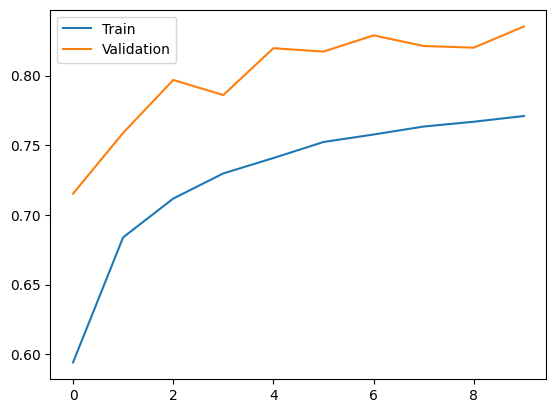

In [40]:
plt.plot(history_mod_augm.history["accuracy"], label="Train")
plt.plot(history_mod_augm.history["val_accuracy"], label="Validation")
plt.legend()
plt.show()

Use **early stopping**. The training process will be interrupted when the monitored metric does not improve for a specified number of epochs. This approach prevents the need to retrain the network with a reduced number of epochs when the initially set number of epochs is too high and the model starts to overfit.

> [Documentation - Early Stopping](https://keras.io/api/callbacks/early_stopping/)

In combination with early stopping, the *ModelCheckpoint* callback is typically used, which allows saving the state of the model during training (you can save only the best version achieved - with the best performance at the end of the current epoch).

> [Documentation - ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/)



In [41]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=4, 
    restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', 
    monitor='val_accuracy', 
    save_best_only=True, 
    mode='max'
)

history_mod_checkpoint = model_modified.fit(
    datagen.flow(X_train_norm, y_train, batch_size=batch_size),
    epochs=30,
    validation_data=(X_val_norm, y_val),
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/30
1875/1875 [==============================] - 44s 23ms/step - loss: 0.6134 - accuracy: 0.7724 - val_loss: 0.4663 - val_accuracy: 0.8280
Epoch 2/30
   4/1875 [..............................] - ETA: 37s - loss: 0.6043 - accuracy: 0.7500 

/home/pzalewsk/dev/studia/machine_learning/myenv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 43s 23ms/step - loss: 0.6020 - accuracy: 0.7792 - val_loss: 0.4583 - val_accuracy: 0.8348
Epoch 3/30
1875/1875 [==============================] - 42s 22ms/step - loss: 0.5990 - accuracy: 0.7792 - val_loss: 0.4560 - val_accuracy: 0.8412
Epoch 4/30
1875/1875 [==============================] - 43s 23ms/step - loss: 0.5932 - accuracy: 0.7807 - val_loss: 0.4356 - val_accuracy: 0.8472
Epoch 5/30
1875/1875 [==============================] - 42s 22ms/step - loss: 0.5825 - accuracy: 0.7848 - val_loss: 0.4481 - val_accuracy: 0.8440
Epoch 6/30
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5799 - accuracy: 0.7870 - val_loss: 0.4606 - val_accuracy: 0.8328
Epoch 7/30
1875/1875 [==============================] - 39s 21ms/step - loss: 0.5778 - accuracy: 0.7863 - val_loss: 0.4489 - val_accuracy: 0.8440
Epoch 8/30
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5782 - accuracy: 0.7886 - val_loss: 0.4355 - val_accura

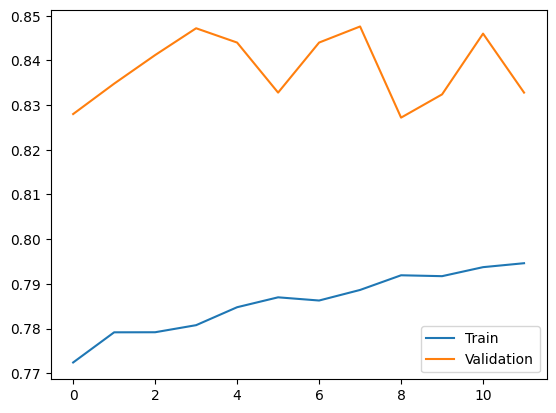

In [42]:
plt.plot(history_mod_checkpoint.history["accuracy"], label="Train")
plt.plot(history_mod_checkpoint.history["val_accuracy"], label="Validation")
plt.legend()
plt.show()

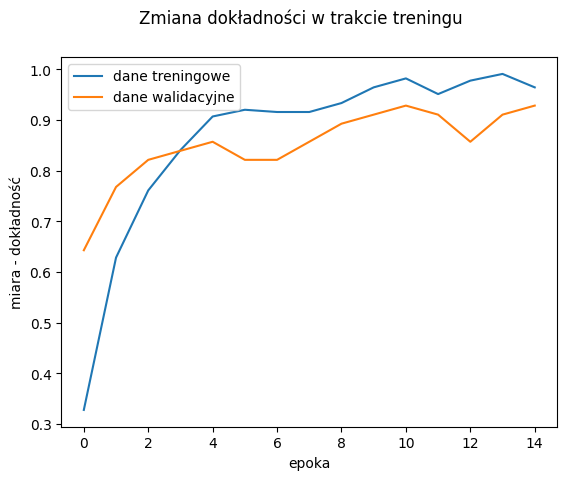

In [29]:
import matplotlib.pyplot as plt

figure = plt.figure()
figure.suptitle("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history_scratch2.history['accuracy'])
plt.plot(history_scratch2.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

# Zadanie 2 (10pt)

Zaprogramuj i pokaż wykorzystanie klasycznych architektur sieci tzw. backbone


## Classical Backbone Networks

Neural networks have been applied to a wide range of problems, often significantly outperforming previously used models. More demanding problems have led to more sophisticated neural models, which, in turn, have become larger in terms of the number of parameters, layers, and complexity.

One of the most explored fields of deep learning is the use of neural models in vision applications. Below is a graph showing the relationship between the sizes of popular neural models most commonly used in computer vision and their classification accuracy (application: image classification, supervised learning).

Source: "An Analysis of Deep Neural Network Models for Practical Applications," Alfredo Canziani, Adam Paszke, Eugenio Culurciello

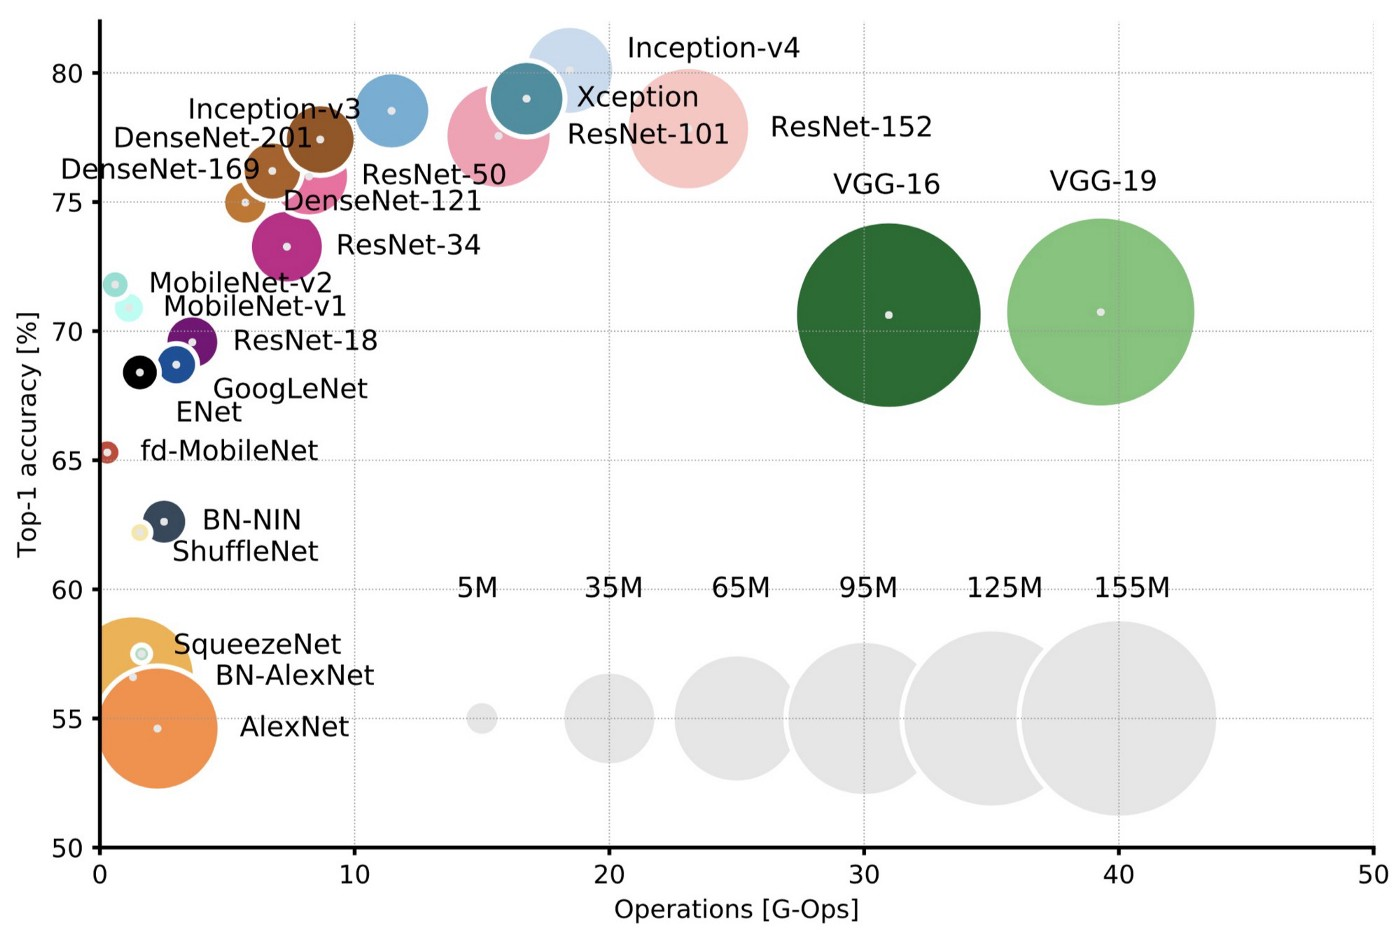

Models with millions of operations and parameters have proven to be very effective tools for problems such as classification, object detection, and text translation. However, their size entails disproportionately increasing computational, time, and memory complexity relative to their effectiveness. Hence, there has been a demand for the development of not deeper, but *smarter* neural models—those with relatively low computational complexity that achieve similar or better results than previously used models.

Since developing an entirely new model that surpasses previous ones in terms of effectiveness is very difficult and costly, the development of networks has started to rely on the incremental improvement of existing models. To avoid the repeated process of training the same neural models, previously trained models began to be reused, thus focusing on the themes of **transfer learning** and **fine-tuning**.

The neural components on which new functionalities are built are called **backbones**. The use of neural models trained on a **different class of problems** to solve a new problem is called **transfer learning**, while the process of fine-tuning pretrained neural models is called **fine-tuning**.

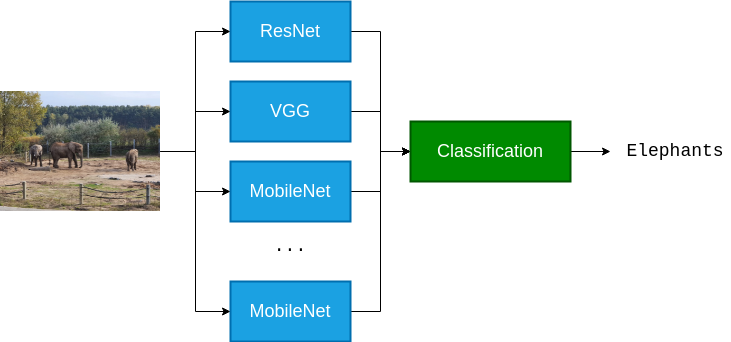

Models such as ResNet, VGG, BERT, and Faster-RCNN are very commonly used in practice, often multiple times within a single large neural model. Therefore, popular machine learning libraries typically include ready-made implementations of some of these models. Additionally, repositories like TensorHub, HuggingFace, and ModelZoo have become popular for sharing existing implementations of popular neural models along with their pretrained versions.

Keras includes ready definitions of popular models (mainly for vision processing, particularly classification) along with the ability to download popular pretrained versions of these models.
To complete this task, use TensorFlow and its adapted module.
Keras includes an internal `applications` module where you can find class definitions for popular neural models. Importantly, these models inherit from the `tf.keras.Model` class, enabling easy integration with your own code.


In [53]:
models = {}
models["resnet"] = tf.keras.applications.ResNet50V2(weights='imagenet')
models["nasnet"] = tf.keras.applications.NASNetLarge(weights='imagenet')
models["densenet"] = tf.keras.applications.DenseNet121(weights='imagenet')
models["vgg"] = tf.keras.applications.VGG16(weights='imagenet')
models["mobilenet"] = tf.keras.applications.MobileNetV2(weights='imagenet')

In [56]:
input_sizes = {name: model.input_shape[1:3] for name, model in models.items()}

In [ ]:
!wget https://drive.google.com/uc?id=1jq6s6lP6B6CeqTDaa5uOrPy5ErSASiBj -O elephants.jpg

In [54]:
def preprocess_image(image_path, target_size):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
    return np.expand_dims(img, axis=0)

def decode_predictions(preds, model_name):
    if model_name == 'resnet':
        return tf.keras.applications.resnet_v2.decode_predictions(preds, top=5)[0]
    elif model_name == 'vgg':
        return tf.keras.applications.vgg16.decode_predictions(preds, top=5)[0]
    elif model_name == 'mobilenet':
        return tf.keras.applications.mobilenet_v2.decode_predictions(preds, top=5)[0]
    elif model_name == 'densenet':
        return tf.keras.applications.densenet.decode_predictions(preds, top=5)[0]
    elif model_name == 'nasnet':
        return tf.keras.applications.nasnet.decode_predictions(preds, top=5)[0]

In this task, use each of the following models pretrained on the ImageNet dataset: ResNet50V2, VGG16, MobileNetV2, etc., and compare these models on the image 'elephants' and a few other images chosen at random from the internet, camera, etc. Then, create a similar diagram/table comparing the complexity of the models. The test set does not need to be large but should include several categories.

In [74]:
data = {image_name: [] for image_name in os.listdir(images_path)}

for model_name, model in models.items():
    for image_name in os.listdir(images_path):
        if image_name.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(images_path, image_name)
            preprocessed_image = preprocess_image(image_path, input_sizes[model_name])
            preds = model.predict(preprocessed_image)
            decoded = decode_predictions(preds, model_name)
            top_prediction = f"{decoded[0][1]} ({decoded[0][2]*100:.2f}%)"
            data[image_name].append(top_prediction)

1/1 [==============================] - 0s 45ms/step


In [75]:
data

{'lion.jpg': ['lion (100.00%)',
  'lion (91.03%)',
  'lion (98.02%)',
  'mosquito_net (4.69%)',
  'lion (91.76%)'],
 'sunset.jpg': ['lakeside (90.58%)',
  'seashore (85.55%)',
  'lakeside (47.62%)',
  'mosquito_net (6.67%)',
  'lakeside (43.03%)'],
 'elephants.jpg': ['African_elephant (94.68%)',
  'African_elephant (89.10%)',
  'African_elephant (85.38%)',
  'mosquito_net (7.36%)',
  'African_elephant (69.18%)'],
 'football.jpg': ['soccer_ball (87.98%)',
  'soccer_ball (85.16%)',
  'soccer_ball (96.61%)',
  'mosquito_net (3.12%)',
  'soccer_ball (83.66%)']}

In [80]:
import pandas as pd
df = pd.DataFrame(data, index=[f"{name} ({model.count_params()} params)" for name, model in models.items()])

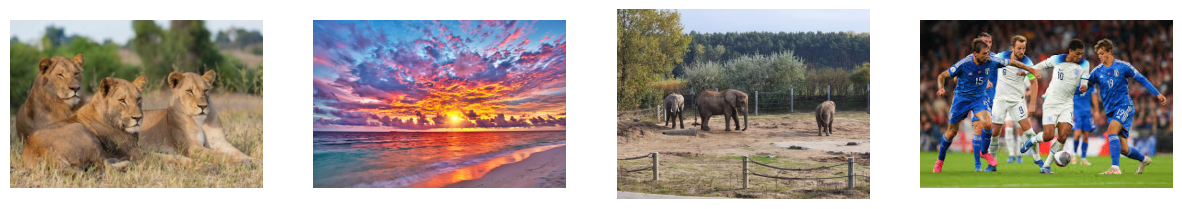

,lion.jpg,sunset.jpg,elephants.jpg,football.jpg
resnet (25.61M params),lion (100.00%),lakeside (90.58%),African_elephant (94.68%),soccer_ball (87.98%)
nasnet (88.95M params),lion (91.03%),seashore (85.55%),African_elephant (89.10%),soccer_ball (85.16%)
densenet (8.06M params),lion (98.02%),lakeside (47.62%),African_elephant (85.38%),soccer_ball (96.61%)
vgg (138.36M params),mosquito_net (4.69%),mosquito_net (6.67%),mosquito_net (7.36%),mosquito_net (3.12%)
mobilenet (3.54M params),lion (91.76%),lakeside (43.03%),African_elephant (69.18%),soccer_ball (83.66%)


In [84]:
import os
images_path = 'datasets/simple_images'

images = []
for path in os.listdir(images_path):
    img = cv2.imread(os.path.join(images_path, path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = tf.image.convert_image_dtype(img, tf.float32)
    images.append(img)

plt.figure(figsize=(15, 15))
for i, img in enumerate(images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


def format_params(num_params):
    if num_params >= 1e6:
        return f"{num_params/1e6:.2f}M params"
    elif num_params >= 1e3:
        return f"{num_params/1e3:.2f}K params"
    else:
        return f"{num_params} params"

formatted_index = [f"{name} ({format_params(model.count_params())})" for name, model in models.items()]

df = pd.DataFrame(data, index=formatted_index)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
display(df)